In [13]:
from numpy.random import default_rng
def simulateDemand(n):
    rng = default_rng()
    p = 0.3
    t = 0
    demand = []
    
    for i in range(n):
        is_promotion = rng.binomial(1, p)
        if is_promotion == 1:
            demand.append(rng.normal(800+100*t, 100))
            t = 0
        else:
            demand.append(rng.normal(500, 100))
            t += 1
    return demand

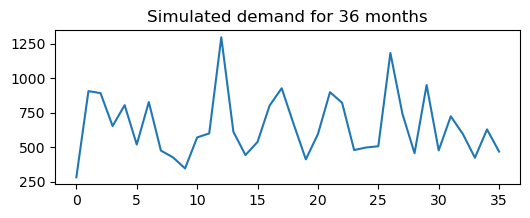

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
pd.Series(simulateDemand(36))\
.plot(title='Simulated demand for 36 months',figsize=(6,2))
plt.show()

In [31]:
def simulateSupply(demand, z):
    discarded = 0
    lost_sales = 0
    unit_ordered = []
    begin_inv = z
    
    for month in range(len(demand)):
        if month <= 1:
            unit_ordered.append(min(begin_inv, demand[month]))
            # print(begin_inv)
        else:
            begin_inv = min(unit_ordered[-1] + unit_ordered[-2], z)
            discarded += (z-begin_inv)
            if begin_inv < demand[month]:
                lost_sales += (demand[month] - begin_inv)
                unit_ordered.append(z)
            else:
                unit_ordered.append(begin_inv - demand[month])
            # print(begin_inv)
            
    return lost_sales, discarded

In [28]:
simulateSupply([30,40,20,100,120],100)

100
100
70
90
100


In [30]:
totalLost,totalDiscarded=simulateSupply([30,40,20,100,120],100)
print(f'totalLost={totalLost} totalDiscarded={totalDiscarded}')

100
100
totalLost=30 totalDiscarded=40


In [44]:
locations = {'a': [1, 2], 'b':[2, 3]}
for key, value in locations.items():
    print(value[0], value[1])

1 2
2 3


In [60]:
def closest_dispatch(locations, origin, destination):
    closest_driver = ''
    closest_distance = 999999
    pickup_distance = 0
    dropoff_distance = 0
    travel_distance = 0
    
    for key, value in locations.items():
        pickup_distance = abs(value[0] - origin[0]) + abs(value[1] - origin[1])
        dropoff_distance = abs(origin[0] - destination[0]) + abs(origin[1] - destination[1])
        if pickup_distance < closest_distance:
            travel_distance = pickup_distance + dropoff_distance
            closest_distance = pickup_distance
            closest_driver = key
            
        # print(f'Closest driver: {closest_driver} \tTravel distance: {closest_distance}')
            
            
    return closest_driver, travel_distance

In [61]:
locations={'Alice':[10,30],'Bob':[20,5],'Charles':[-10,10]}
closest,movement=closest_dispatch(locations,[10,13],[10,60])
print(f'Closest driver: {closest} \tTravel distance: {movement}')

Closest driver: Alice 	Travel distance: 64


In [70]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
...           {'a': 100, 'b': 200, 'c': 300, 'd': 400},
...           {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df = pd.DataFrame(mydict)
df

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [73]:
df.loc[:, 'a']

0       1
1     100
2    1000
Name: a, dtype: int64